In [1]:
from gmprocess.io.read import read_data

import pandas
import json
import urllib.request as urllib2
import requests
from zipfile import ZipFile
import os
from io import BytesIO

In [3]:
os.mkdir("CESMD_data") # make the folder for CESMD dataset
c_dir = os.getcwd() # current directory 
zipdir = os.path.join(c_dir,"CESMD_data")
print(zipdir)

/home/hannah/Documents/gmp/notebook/CESMD_data


In [4]:
# Sample CESMD URL
zip_url='https://www.strongmotioncenter.org/wserv/records/query?eventid=nc73754191&orderby=epidist-asc&rettype=dataset&download=P,R,T&email=hshao@usgs.gov&groupby=event&nodata=404'

In [5]:
# Downloading the file by sending the request to the URL
req=requests.get(zip_url)

In [6]:
# extracting the zip file contents
zipfile=ZipFile(BytesIO(req.content))
zipfile.extractall(zipdir)

In [7]:
# list all files in the zip directory 
res=[]
for (dir_path, dir_names, file_names) in os.walk(zipdir):
    for file in file_names:
        res.append(os.path.join(dir_path,file))
print(res)

zip_files = [ i for i in res if i.endswith('.zip')]
print(zip_files)

['/home/hannah/Documents/gmp/notebook/CESMD_data/metadata.json', '/home/hannah/Documents/gmp/notebook/CESMD_data/nc73754191/nc73754191_NCMCB/nc73754191_ncmcbr.zip', '/home/hannah/Documents/gmp/notebook/CESMD_data/nc73754191/nc73754191_NCMCB/nc73754191_ncmcbp.zip', '/home/hannah/Documents/gmp/notebook/CESMD_data/nc73754191/nc73754191_NCMCB/nc73754191_ncmcb.gif', '/home/hannah/Documents/gmp/notebook/CESMD_data/nc73754191/nc73754191_NCMCO/nc73754191_ncmcop.zip', '/home/hannah/Documents/gmp/notebook/CESMD_data/nc73754191/nc73754191_NCMCO/nc73754191_ncmcor.zip', '/home/hannah/Documents/gmp/notebook/CESMD_data/nc73754191/nc73754191_NCMCO/nc73754191_ncmco.gif', '/home/hannah/Documents/gmp/notebook/CESMD_data/nc73754191/nc73754191_CE54545/nc73754191_ce54545.pdf', '/home/hannah/Documents/gmp/notebook/CESMD_data/nc73754191/nc73754191_CE54545/nc73754191_ce54545p.zip', '/home/hannah/Documents/gmp/notebook/CESMD_data/nc73754191/nc73754191_CE54545/nc73754191_ce54545r.zip', '/home/hannah/Documents/gm

In [8]:
for i in zip_files:
    z = ZipFile(i)
    z.extractall(zipdir+'/v_files/')


In [9]:
v_list = os.listdir(zipdir+'/v_files/')
v_list.sort()
v_list

['NCMCB.V1',
 'NCMCB.V2',
 'NCMCB.V3',
 'NCMCO.V1',
 'NCMCO.V2',
 'NCMCO.V3',
 'chan001.v1',
 'chan001.v2',
 'chan001.v3',
 'chan002.v1',
 'chan002.v2',
 'chan002.v3',
 'chan003.v1',
 'chan003.v2',
 'chan003.v3',
 'chan004.v1',
 'chan004.v2',
 'chan004.v3',
 'chan005.v1',
 'chan005.v2',
 'chan005.v3',
 'chan006.v1',
 'chan006.v2',
 'chan006.v3',
 'cimlac.v1',
 'cimlac.v2',
 'cimlac.v3']

3 StationTrace(s) in StationStream (passed):
--.MCB.--.HN2 | 2022-07-04T07:22:19.300000Z - 2022-07-04T07:24:03.290000Z | 100.0 Hz, 10400 samples (passed)
--.MCB.--.HN1 | 2022-07-04T07:22:19.300000Z - 2022-07-04T07:24:03.290000Z | 100.0 Hz, 10400 samples (passed)
--.MCB.--.HNZ | 2022-07-04T07:22:19.300000Z - 2022-07-04T07:24:03.290000Z | 100.0 Hz, 10400 samples (passed)


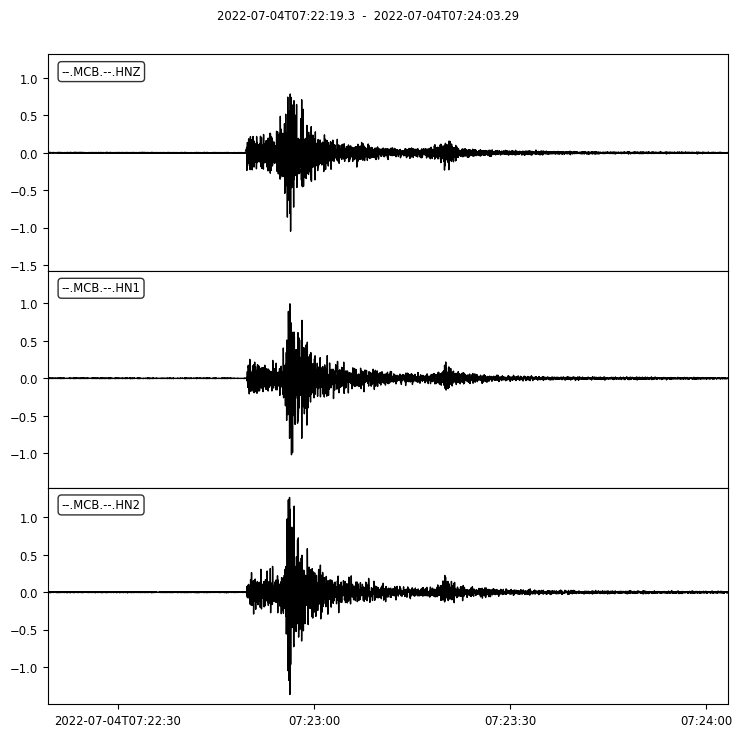

3 StationTrace(s) in StationStream (passed):
--.MCO.--.HN2 | 2022-07-04T07:22:18.600000Z - 2022-07-04T07:24:02.590000Z | 100.0 Hz, 10400 samples (passed)
--.MCO.--.HN1 | 2022-07-04T07:22:18.600000Z - 2022-07-04T07:24:02.590000Z | 100.0 Hz, 10400 samples (passed)
--.MCO.--.HNZ | 2022-07-04T07:22:18.600000Z - 2022-07-04T07:24:02.590000Z | 100.0 Hz, 10400 samples (passed)


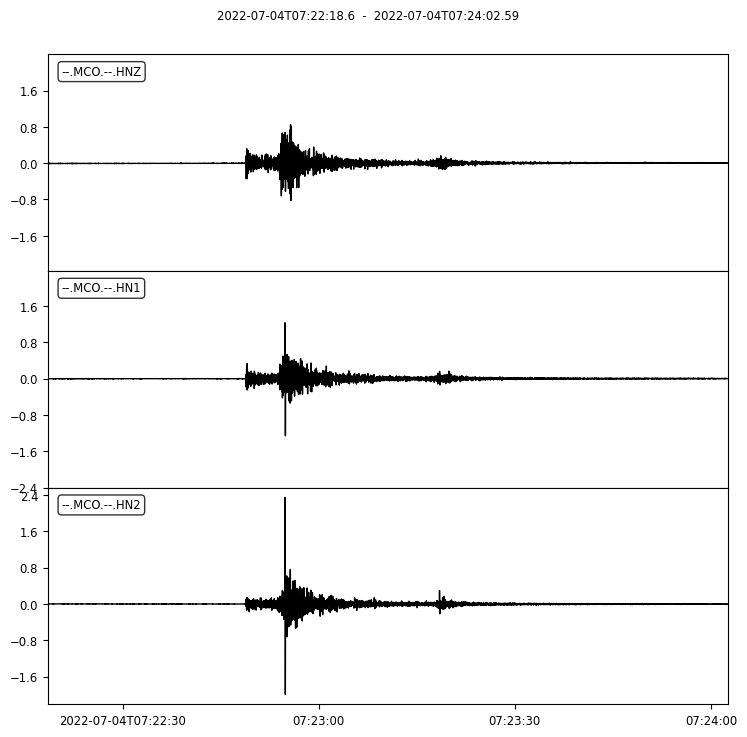

In [10]:
v1_list = [i for i in v_list if i.endswith('.V1')]
for i in v1_list:
    filename = zipdir+'/v_files/'+i
    st=read_data(filename)
    print(st[0])
    st[0].plot()